## Fuction to Calculate the first component weight vector 


### Objective function
we would like to find the solution of the problem:
$\max_{\mathbf{w}\in \mathcal{B}}\mathbf{w\Sigma w} - \lambda ||\mathbf{w}||_{0} $

### Thresholding function 
Add the thresholding funciton:

### Algorithm: l0_pca

## Small data example
We rely on the eigenvalue decomposition of $\mathbf{\Sigma} = \mathbf{VDV}^{\top}$. With $\mathbf{V} = [-.302, 0,0,.302,-.905]$ and $\mathbf{D} = 5$


In [1]:
# Sigma is a 5x5 matrix with 
import numpy as np
v = np.array([-.302, 0,0,.302,-.905])
# Reshape to column vector
v = v.reshape(-1, 1)

sig_1 =  np.array([5]).reshape(-1, 1)

# eigenvector decomposition
Sigma = v @ sig_1 @ v.T  # this is not a covariance matrix.

print(Sigma)


[[ 0.45602   0.        0.       -0.45602   1.36655 ]
 [ 0.        0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.      ]
 [-0.45602   0.        0.        0.45602  -1.36655 ]
 [ 1.36655   0.        0.       -1.36655   4.095125]]


Now we apply the funciton l0_pca to the matrix $\Sigma$

In [2]:
# Implementing the l0_pca function on the matrix Sigma.
from op_spca import l0_pca, objective_function
w0 = np.array([-0.4067982, -0.2218409, 0.1263868, 0.7081635, -0.5175255])
print(np.linalg.norm(w0))
obj0 = objective_function(Sigma, w0, 0.7)
print(obj0)
regularization = 0.7
w, obj = l0_pca(Sigma, w0, regularization, method = "cov")
type(obj)
print(obj.shape)



0.9999999847663948
-0.2592389310413883
Convergence achieved after 1001 iterations
(1001, 1)


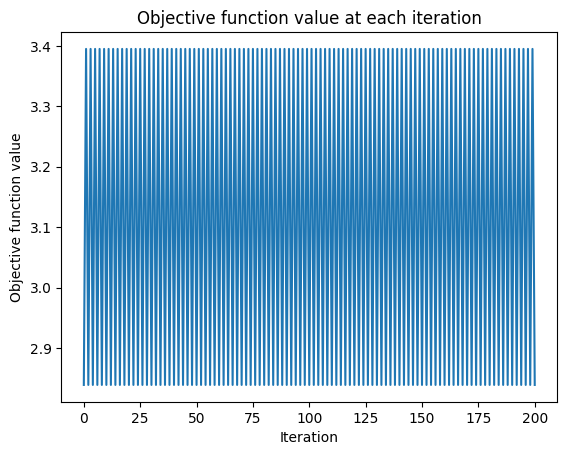

In [25]:
# plotting the objective function value at each iteration
import matplotlib.pyplot as plt
plt.plot(obj[800:])
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration')
plt.show()

Now, we apply the the function with the same parameter using the matrix $\mathbf{\Sigma}_{+} = \mathbf{\Sigma} + \gamma \mathbf{I}$, with $\gamma > 1$

In [4]:
# Sigma + \gamma I
Sigma_plus = Sigma + 1.1 * np.identity(Sigma.shape[0])
w_plus, obj_plus = l0_pca(Sigma_plus, w0, regularization, method = "cov")


Convergence achieved after 5 iterations


<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\guerraur\AppData\Local\Temp\ipykernel_23236\1028003662.py:5: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')


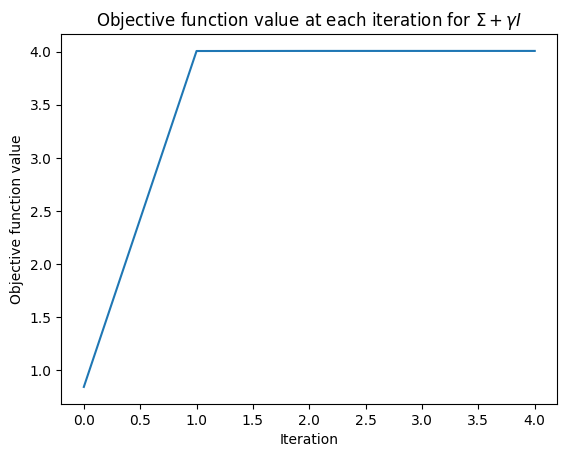

In [139]:
# plotting the objective function value at each iteration for Sigma + \gamma I
plt.plot(obj_plus)
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')
plt.show()

## Real data set experiment
We import a data set form the MicOmics R package

In [5]:
# load data set using pandas
import pandas as pd
data = pd.read_csv('diverse_16_data.csv',index_col=0)

# print the first 5 rows and 5 columns of the data
print(data.iloc[:5,:5])
print(data.shape)
# check for missing values
print(data.isnull().sum().sum())


           OTU_97.10  OTU_97.10029  OTU_97.101  OTU_97.1010  OTU_97.10101
700015293   0.000161      0.000323    0.000161     0.000161      0.000807
700015227   0.000536      0.000536    0.000536     0.000536      0.001072
700105879   0.000336      0.000336    0.000336     0.000336      0.000336
700037087   0.001042      0.000260    0.000260     0.000260      0.000260
700105616   0.000534      0.000534    0.000534     0.000534      0.000534
(162, 1674)
0


C:\Users\guerraur\AppData\Local\Temp\ipykernel_24088\578078249.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Implementation of the l0_pca function on the diverse_16_data.csv
# initial weight vector
w0_data = np.random.rand(data.shape[1]).reshape(-1,1)
# regularization parameter
regularization_data = 0.001

# l0_pca
w_data, obj_data = l0_pca(data, w0_data, regularization_data, method = "data")


Convergence achieved after 1001 iterations


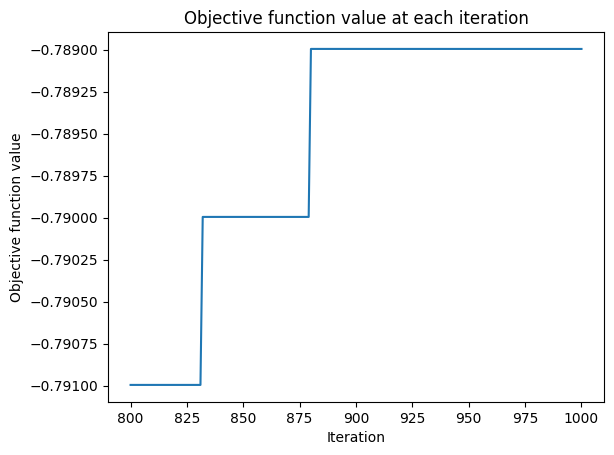

In [24]:
# plotting the objective function value at each iteration
plt.plot(obj_data[800:])
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration')
plt.show()

In [7]:
# add gamma I to the covariance matrix
data_cov = data.T @ data
data_cov_plus = data_cov + 1.01 * np.identity(data_cov.shape[0])
w_data_plus, obj_data_plus = l0_pca(data_cov_plus, w0_data, regularization_data, method = "cov")


Convergence achieved after 44 iterations


<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\guerraur\AppData\Local\Temp\ipykernel_24088\3038665790.py:5: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')


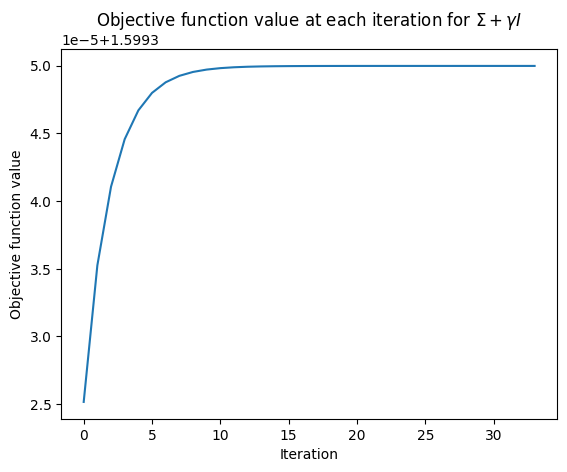

In [8]:
# plotting the objective function value at each iteration for Sigma + \gamma I
plt.plot(obj_data_plus[10:])
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')
plt.show()